# Avaliação Geral

In [19]:
# Importações de libaries importantes
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
sys.path.append("../")
from neuroscan import *

In [20]:
# Modelo NeuroscanSUS pretreinado
modelo = tf.keras.models.load_model("../neuroscan/modelos/modelo.h5")
modelo2 = tf.keras.models.load_model("../neuroscan/modelos/modelo2.h5")

In [21]:
# Dados de Teste

dados_teste = tf.data.Dataset.load("../neuroscan/assets/imagens_teste")

x_teste, y_teste = [], []

for x, y in dados_teste:

    x_teste.append(x)
    y_teste.append(y)

x_teste = tf.concat(x_teste, axis=0)
y_teste = tf.concat(y_teste, axis=0)

In [22]:
predicao1 = modelo.predict(x_teste)
predicao2 = modelo2.predict(x_teste)

10/10 [==============================] - 11s 205ms/step


In [23]:
predicao_classe = np.argmax(predicao1, axis=-1)
predicao_classe2 = np.argmax(predicao2, axis=-1)

              precision    recall  f1-score   support

           0       0.69      0.26      0.38        76
           1       0.83      0.92      0.87        92
           2       0.69      0.95      0.80        83
           3       0.84      0.90      0.87        62

    accuracy                           0.77       313
   macro avg       0.76      0.76      0.73       313
weighted avg       0.76      0.77      0.73       313



<AxesSubplot:>

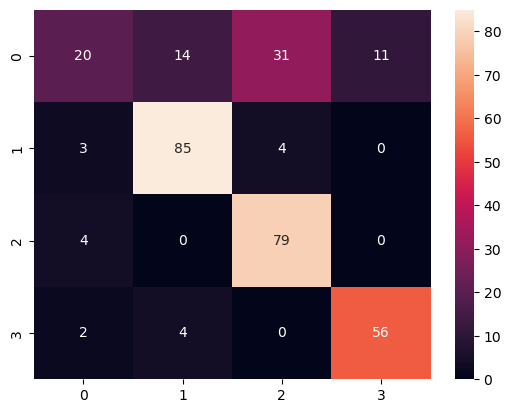

In [28]:
print(classification_report(y_teste, predicao_classe))
sns.heatmap(confusion_matrix(y_teste, predicao_classe), annot=True)

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        76
           1       0.77      1.00      0.87        92
           2       0.70      1.00      0.83        83
           3       0.87      0.85      0.86        62

    accuracy                           0.78       313
   macro avg       0.84      0.76      0.72       313
weighted avg       0.83      0.78      0.73       313



<AxesSubplot:>

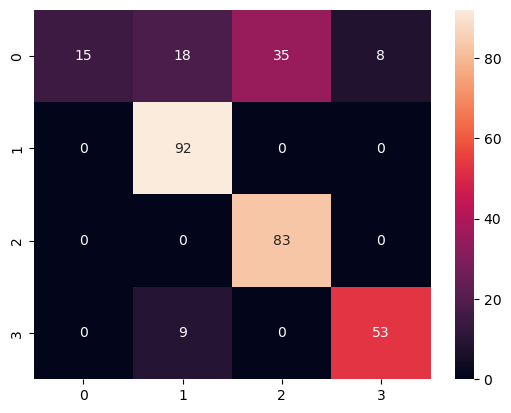

In [29]:
print(classification_report(y_teste, predicao_classe2))
sns.heatmap(confusion_matrix(y_teste, predicao_classe2), annot=True)